## We have two goals in our application of machine learning: 
### 1. Predicting Stress-Strain Curves
### 2. Automatically determining the region where plastic deformation occurs (Classification, and finding the border)

In [17]:
%matplotlib notebook
from irreversible_stressstrain import StressStrain

model2 = StressStrain('ref/HSRS/222')
model3 = StressStrain('ref/HSRS/326')

## Visualize our experimental data

In [37]:
%matplotlib inline
import test_suite
reload(test_suite)
from test_suite import plot2D

"""Establishing our models"""
exp2 = model2.get_experimental_data()
exp3 = model3.get_experimental_data()

"""Plots 2 identical graphs, which isn't good..."""
#plot2D(StressStrain('ref/HSRS/22').get_experimental_data(),'stress','strain','HSRS/22')
#plot2D(exp2,'stress','strain','HSRS/222')
#plot2D(exp3,'stress','strain','HSRS/326')

print type(exp2[0])

<type 'numpy.ndarray'>


In [2]:
import irreversible_stressstrain
reload(irreversible_stressstrain)
from irreversible_stressstrain import StressStrain

import test_suite
reload(test_suite)
from test_suite import plot2D

model2 = StressStrain('ref/HSRS/222')
model3 = StressStrain('ref/HSRS/326')

"""Establishing our models"""
exp2 = model2.get_experimental_data()
exp3 = model3.get_experimental_data()

"""Print last two values of each to ascertain domain"""
x1 = exp2[:,0]
x2 = exp3[:,0]

"""
These are the same which means, it's being overwritten.
This is because exp is a global variable, it should be an object variable.
(FIXED)
"""

print x1[-1]
print x2[-1]

24.47717992
27.61252945


In [67]:
"""
We are using 'squared_loss' here because we don't have too many outliers in our
data, otherwise, it would be better to use Huber. This is a linear model, but we
are going to try to fit it to our data.
"""

from sklearn.linear_model import SGDRegressor
import numpy as np
reg = SGDRegressor(loss='squared_loss') 

reg.fit(exp2[:,0].reshape(-1,1),exp2[:,1].reshape(-1,1))
#print reg.predict(100)


guess_domain = np.linspace(0,25.,51).reshape(-1,1)
#print guess_domain

guess_range = reg.predict(guess_domain)
#print guess_range

#print guess_domain, guess_range

#make this better, to improve speed instead of appending
data = np.zeros(0).reshape(-1,1)

for index, entry in enumerate(guess_domain):
    data = np.vstack((data,np.array((guess_domain[index,0],guess_range[index])).reshape(-1,2)))

print data


/site/x86/anaconda-1.8/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [24]:
from sklearn.linear_model import SGDRegressor
import numpy as np
reg = SGDRegressor(loss='squared_loss') 

reg.fit(exp2[:,0].reshape(-1,1),exp2[:,1].reshape(-1,1))

guess_domain = np.linspace(0,25.,51)
guess_range = reg.predict(guess_domain[:,None])

print guess_domain, guess_range
data = []

for index, guess in enumerate(guess_domain):  
    data.append([guess_domain[index],guess_range[index]])

data = np.asarray(data)
print data

[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25. ] [  306.37842782   321.10772227   335.83701673   350.56631118   365.29560563
   380.02490009   394.75419454   409.483489     424.21278345   438.94207791
   453.67137236   468.40066681   483.12996127   497.85925572   512.58855018
   527.31784463   542.04713908   556.77643354   571.50572799   586.23502245
   600.9643169    615.69361136   630.42290581   645.15220026   659.88149472
   674.61078917   689.34008363   704.06937808   718.79867254   733.52796699
   748.25726144   762.9865559    777.71585035   792.44514481   807.17443926
   821.90373371   836.63302817   851.36232262   866.09161708   880.82091153
   895.55020599   910.27950044   925.00879489   939.73808935   954.4673838
   96

/site/x86/anaconda-1.8/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


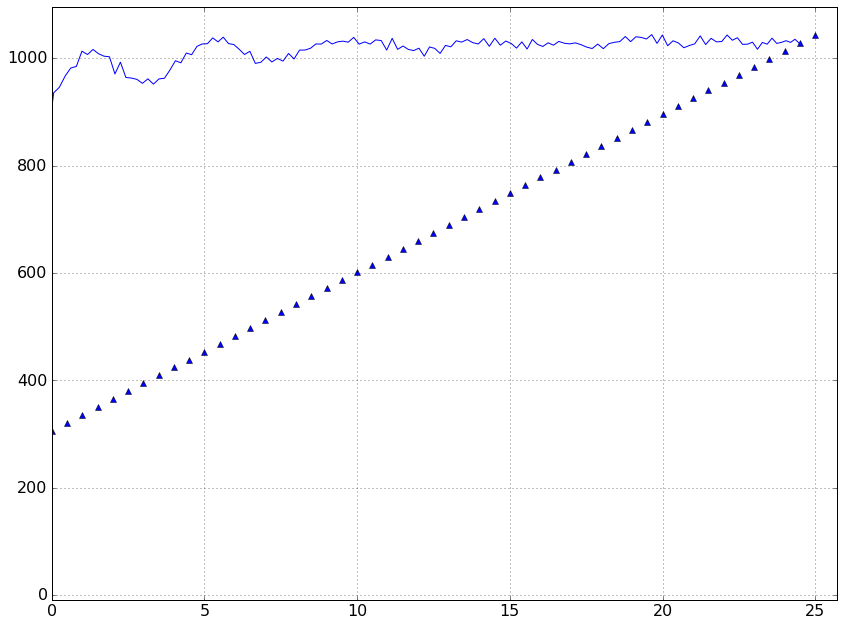

In [27]:
%matplotlib inline
import test_suite
reload(test_suite)
test_suite.plotmult2D(exp2,data)

In [ ]:
"""Template for fitting data"""

from sklearn.linear_model import SGDRegressor
import numpy as np
reg = SGDRegressor(loss='squared_loss') 

reg.fit(exp2[:,0].reshape(-1,1),exp2[:,1].reshape(-1,1))

guess_domain = np.linspace(0,25.,51)
guess_range = reg.predict(guess_domain[:,None])

data = []

for index, guess in enumerate(guess_domain):  
    data.append([guess_domain[index],guess_range[index]])

data = np.asarray(data)
print data

### Not a good fit, let's try something different 

(UPDATE): Fitting process should take pairs of values

In [44]:
import irreversible_stressstrain
reload(irreversible_stressstrain)
from irreversible_stressstrain import StressStrain

from sklearn.linear_model import LinearRegression
import numpy as np

import test_suite
reload(test_suite)
from test_suite import plot2D

model2 = StressStrain('ref/HSRS/222')
model3 = StressStrain('ref/HSRS/326')

"""Establishing our models"""
exp2 = model2.get_experimental_data()
exp3 = model3.get_experimental_data()

clf = LinearRegression()
clf.fit(exp2[:,0].reshape(-1,1),exp2[:,1].reshape(-1,1))
guess_domain = np.linspace(0,25.,51)
guess_range = clf.predict(guess_domain[:,None])

data = []

for index, guess in enumerate(guess_domain):  
    data.append([guess_domain[index],guess_range[index]])

data = np.asarray(data)
print clf.get_params()
#test_suite.plotmult2D(exp2,data)

{'copy_X': True, 'normalize': False, 'n_jobs': 1, 'fit_intercept': True}


In [52]:
import irreversible_stressstrain
reload(irreversible_stressstrain)
from irreversible_stressstrain import StressStrain

from sklearn.linear_model import LinearRegression
import numpy as np

import test_suite
reload(test_suite)
from test_suite import plot2D

model2 = StressStrain('ref/HSRS/222')
model3 = StressStrain('ref/HSRS/326')

"""Establishing our models"""
exp2 = model2.get_experimental_data()
exp3 = model3.get_experimental_data()

clf = LinearRegression()

print exp2[:,0].tolist(),exp2[:,1].tolist()
clf.fit(exp2[:,0].tolist(),exp2[:,1].tolist())


259 259


/site/x86/anaconda-1.8/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [  1 259]

## Will try to implement simple Linear Regression to understand the expected format

In [84]:
import irreversible_stressstrain
reload(irreversible_stressstrain)
from irreversible_stressstrain import StressStrain

from sklearn.linear_model import LinearRegression
import numpy as np

import test_suite
reload(test_suite)
from test_suite import plot2D

clf = LinearRegression()

clf.fit ([(0, ), (1, ), (2 , )], [0, 1, 9])
clf.predict(6)


array([ 25.83333333])

In [110]:
import irreversible_stressstrain
reload(irreversible_stressstrain)
from irreversible_stressstrain import StressStrain

from sklearn.linear_model import LinearRegression
import numpy as np

import test_suite
reload(test_suite)
from test_suite import plot2D

model2 = StressStrain('ref/HSRS/222')
model3 = StressStrain('ref/HSRS/326')

"""Establishing our models"""
exp2 = model2.get_experimental_data()
exp3 = model3.get_experimental_data()

start = -20 # mark as none to feed all data to algorithm
x_train = []
y_train = exp2[start:,1]

"""Our problem is that our data close to the origin is largely throwing off our estimates"""

# -- all values must be added as tuples because the domain has to be iterable to account for higher dims
for data in exp2[start:,0]:
    x_train.append((data, ))

#print x_train

clf.fit(x_train,y_train)
clf.predict(10.)

array([ 1042.15184224])

## We can try to classify data into 2 sets to identify point of necking, and then furthermore fit a model to each of these groups

In [134]:
from sklearn.cluster import MiniBatchKMeans as mbkmeans
reg = mbkmeans(n_clusters=2)
reg.fit(x_train,y_train)
reg.predict(10.)

"""array[0] is the first group, array[1] is the other"""

'array[0] is the first group, array[1] is the other'

In [177]:
import irreversible_stressstrain
reload(irreversible_stressstrain)
from irreversible_stressstrain import StressStrain

from sklearn.linear_model import LinearRegression
from sklearn.cluster import MiniBatchKMeans as mbkmeans

import numpy as np

import test_suite
reload(test_suite)
from test_suite import plot2D

model2 = StressStrain('ref/HSRS/222')
model3 = StressStrain('ref/HSRS/326')

"""Establishing our models"""
exp2 = model2.get_experimental_data()
exp3 = model3.get_experimental_data()

start = None # mark as None to feed all data to algorithm
x_train = []
y_train = exp2[start:,1]

"""Our problem is that our data close to the origin is largely throwing off our estimates"""

# -- all values must be added as tuples because the domain has to be iterable to account for higher dims
for data in exp2[start:,0]:
    x_train.append((data, ))
    
reg = mbkmeans(n_clusters=2)
reg.fit(x_train,y_train)

# -- predicts the group of every value in exp
guess_range = reg.predict(exp2[:,0].reshape(-1,1)) 
initgroup = guess_range[0]
splitgroup = 0

for index, val in enumerate(guess_range):
    
    if val is not initgroup:
        splitgroup = index
        print splitgroup
        break
        
group1x = exp2[:splitgroup,0]
group1y = exp2[:splitgroup,1]

group2x = exp2[splitgroup:,0]
group2y = exp2[splitgroup:,1]

group1 = zip(group1x,group1y)
print group1x

0
[]


## Working on splitting values into two groups after clustering

994.71643731


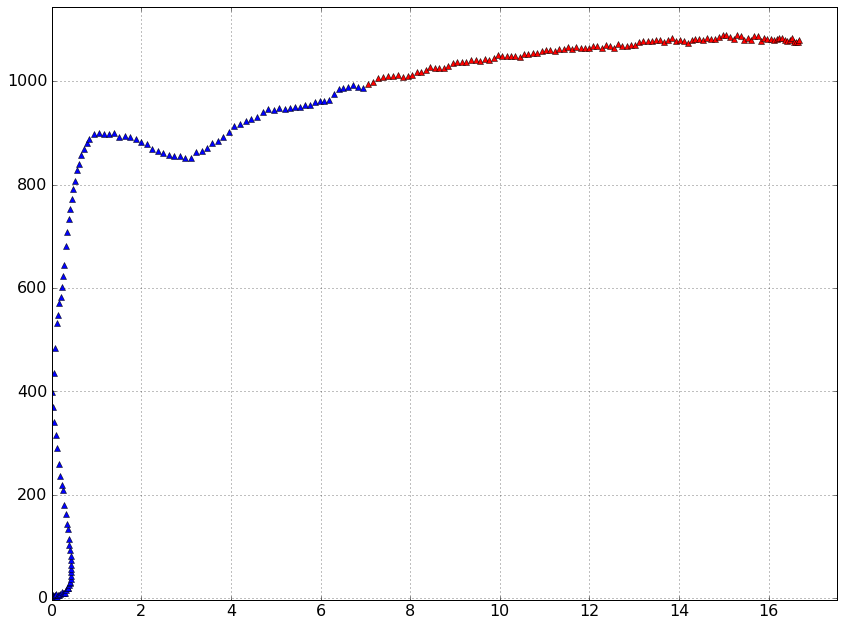

In [335]:
import irreversible_stressstrain
reload(irreversible_stressstrain)
from irreversible_stressstrain import StressStrain

from sklearn.linear_model import LinearRegression
from sklearn.cluster import MiniBatchKMeans as mbkmeans

import numpy as np

import test_suite
reload(test_suite)
from test_suite import plot2D

model2 = StressStrain('ref/HSRS/22')
model3 = StressStrain('ref/HSRS/326')

"""Establishing our models"""
exp2 = model2.get_experimental_data()
exp3 = model3.get_experimental_data()

# mark as None to feed all data to algorithm
start = None 
y_train = exp2[start:,1]
x_train = test_suite.expToTrain(exp2)
    
reg = mbkmeans(n_clusters=2) # 2 groups
reg.fit(x_train,y_train)

# -- predicts the group of every value in exp
guess_range = reg.predict(exp2[:,0].reshape(-1,1)) 

initgroup = guess_range[0]
splitgroup = 0

for index, val in enumerate(guess_range):
    
    # as soon as we reach the new group, we have found our dividing point
    if val != initgroup:
        splitgroup = index
        break
        
group1x = exp2[:splitgroup,0]
group1y = exp2[:splitgroup,1]

group2x = exp2[splitgroup:,0]
group2y = exp2[splitgroup:,1]

"""Instead of creating tuples, we create lists"""
elastic = np.array([list(a) for a in zip(group1x,group1y)]) 
plastic = np.array([list(a) for a in zip(group2x,group2y)])

print data[splitgroup,1]
test_suite.plotmult2D(elastic,plastic)

### Now that we have two groups we can try to fit a linear model to each

In [242]:
import irreversible_stressstrain
reload(irreversible_stressstrain)
from irreversible_stressstrain import StressStrain

from sklearn.linear_model import LinearRegression
import numpy as np

import test_suite
reload(test_suite)
from test_suite import plot2D

model2 = StressStrain('ref/HSRS/222')
model3 = StressStrain('ref/HSRS/326')

"""Establishing our models"""
exp2 = model2.get_experimental_data()
exp3 = model3.get_experimental_data()

start = -20 # mark as none to feed all data to algorithm
x_train = []
y_train = exp2[start:,1]

"""Our problem is that our data close to the origin is largely throwing off our estimates"""

# -- all values must be added as tuples because the domain has to be iterable to account for higher dims
for data in exp2[start:,0]:
    x_train.append((data, ))

#print x_train

clf.fit(x_train,y_train)
clf.predict(10.)

array([ 1042.15184224])

In [255]:
import test_suite
reload(test_suite)

model2 = StressStrain('ref/HSRS/222')
model3 = StressStrain('ref/HSRS/326')

"""Establishing our models"""
exp2 = model2.get_experimental_data()
exp3 = model3.get_experimental_data()

"""Uses module to create a linear model"""
linmodel = test_suite.linfit(exp2,start=-20)
linmodel.predict(10.)

array([ 1042.15184224])

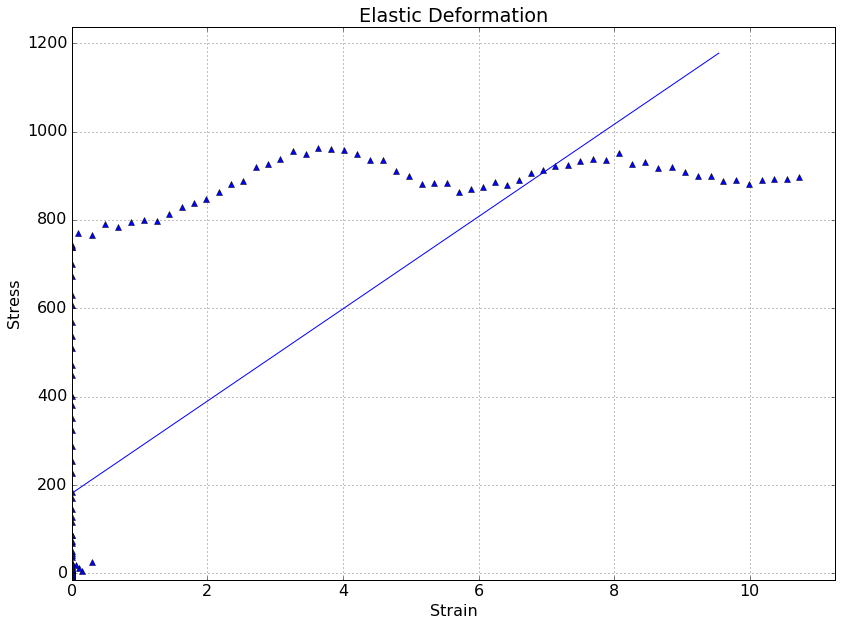

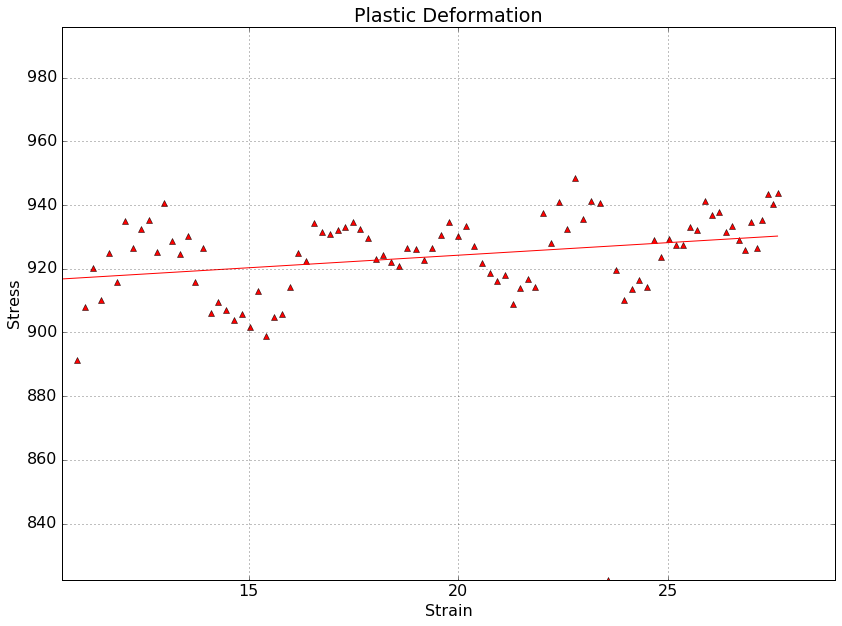

In [282]:
import irreversible_stressstrain
reload(irreversible_stressstrain)
from irreversible_stressstrain import StressStrain

from sklearn.linear_model import LinearRegression
from sklearn.cluster import MiniBatchKMeans as mbkmeans

import numpy as np

import test_suite
reload(test_suite)
from test_suite import plot2D

model2 = StressStrain('ref/HSRS/326')

"""Establishing our models"""
exp2 = model2.get_experimental_data()

# mark as None to feed all data to algorithm
start = -20 
y_train = exp2[start:,1]
x_train = test_suite.expToTrain(exp2)
    
reg = mbkmeans(n_clusters=2) # 2 groups
reg.fit(x_train,y_train)

# -- predicts the group of every value in exp
guess_range = reg.predict(exp2[:,0].reshape(-1,1)) 

initgroup = guess_range[0]
splitgroup = 0

for index, val in enumerate(guess_range):
    
    # as soon as we reach the new group, we have found our dividing point
    if val != initgroup:
        splitgroup = index
        break
        
splitval = exp2[splitgroup,0]
        
group1x = exp2[:splitgroup,0]
group1y = exp2[:splitgroup,1]

group2x = exp2[splitgroup:,0]
group2y = exp2[splitgroup:,1]

"""Instead of creating tuples, we create lists"""
elastic = np.array([list(a) for a in zip(group1x,group1y)]) 
plastic = np.array([list(a) for a in zip(group2x,group2y)])

elfit = test_suite.linfit(elastic)
plfit = test_suite.linfit(plastic)

elasticregion = np.linspace(0,splitval-1,51.)
plasticregion = np.linspace(splitval,max(exp2[:,0]),51.)

test_suite.plotmult2D(elastic,test_suite.combine_data(sample1,elfit.predict(elasticregion[:,None])), marker2 = 'b-', 
                      xtitle='Strain', ytitle = 'Stress', title='Elastic Deformation')
test_suite.plotmult2D(plastic,test_suite.combine_data(sample2,plfit.predict(plasticregion[:,None])), 
                      marker1 = '^r', marker2 = 'r-',xtitle='Strain', ytitle = 'Stress', title='Plastic Deformation')

## Useful for dividing up data set into two portions

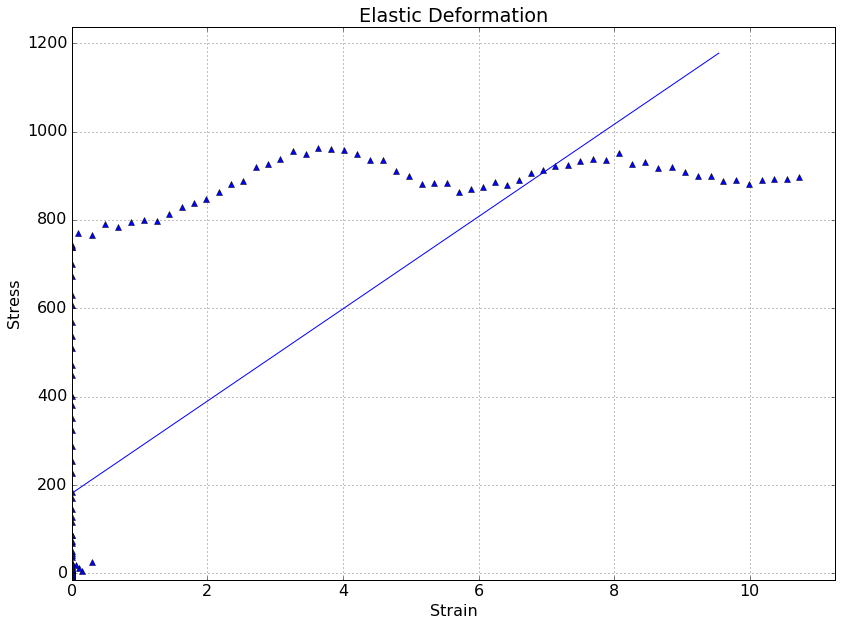

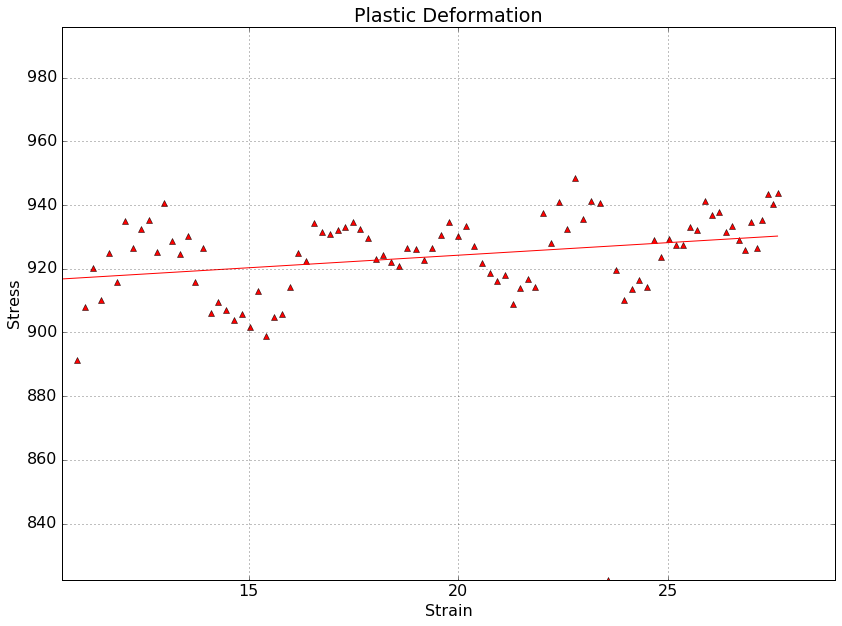

In [280]:
from irreversible_stressstrain import StressStrain

import numpy as np

import test_suite
reload(test_suite)

import graph_suite

model2 = StressStrain('ref/HSRS/326')
exp2 = model2.get_experimental_data()

test_suite.kminicluster(exp2,numclusters=2)

# -- predicts the group of every value in exp
guess_range = reg.predict(exp2[:,0].reshape(-1,1)) 
initgroup = guess_range[0]
splitgroup = 0

for index, val in enumerate(guess_range):
    
    # as soon as we reach the new group, we have found our dividing point
    if val != initgroup:
        splitgroup = index
        break
        
splitval = exp2[splitgroup,0]
        
group1x = exp2[:splitgroup,0]
group1y = exp2[:splitgroup,1]

group2x = exp2[splitgroup:,0]
group2y = exp2[splitgroup:,1]

"""Instead of creating tuples, we create lists"""
elastic = test_suite.combine_data(group1x,group1y)
plastic = test_suite.combine_data(group2x,group2y)

elfit = test_suite.linfit(elastic)
plfit = test_suite.linfit(plastic)

elasticregion = np.linspace(0,splitval-1,51.)
plasticregion = np.linspace(splitval,max(exp2[:,0]),51.)

graph_suite.plotmult2D(elastic,test_suite.combine_data(sample1,elfit.predict(elasticregion[:,None])), marker2 = 'b-', 
                      xtitle='Strain', ytitle = 'Stress', title='Elastic Deformation')
graph_suite.plotmult2D(plastic,test_suite.combine_data(sample2,plfit.predict(plasticregion[:,None])), 
                      marker1 = '^r', marker2 = 'r-',xtitle='Strain', ytitle = 'Stress', title='Plastic Deformation')

## Approximating partial derivatives through slope

In [298]:
data = StressStrain('ref/HSRS/326').get_experimental_data()
print len(data[:,0])
slopes = [0]
 
for index in xrange(len(data[:,0])-1):
    slopes.append((data[index+1,1]-data[index,1])/(data[index+1,0]-data[index,0]))
    
print len(slopes)

264
264


/site/x86/anaconda-1.8/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars
/site/x86/anaconda-1.8/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


994.71643731


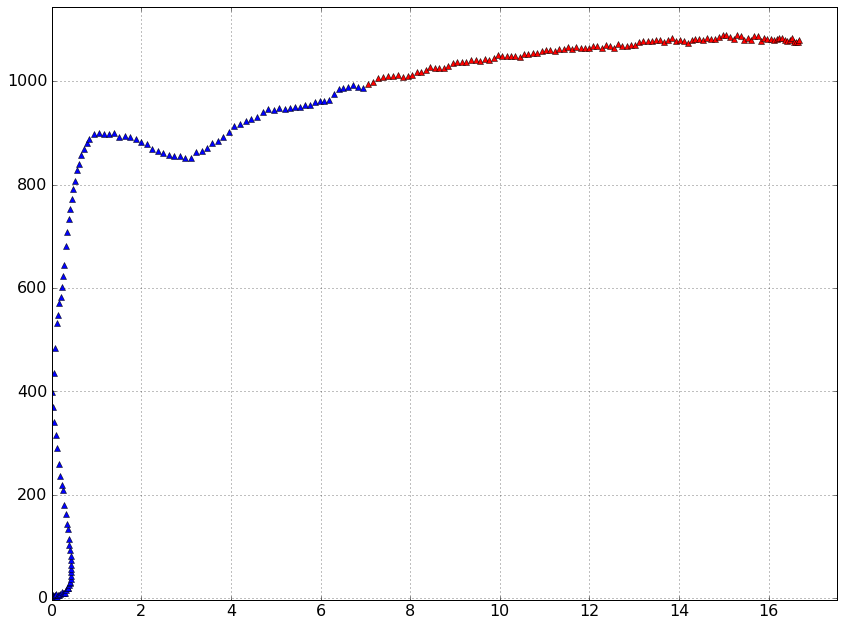

In [11]:
%matplotlib inline
import test_suite
reload(test_suite)
import graph_suite
from irreversible_stressstrain import StressStrain
data = StressStrain('ref/HSRS/22').get_experimental_data()
slopes = [0]
 
for index in xrange(len(data[:,0])-1):
    slopes.append((data[index+1,1]-data[index,1])/(data[index+1,0]-data[index,0]))

slopes = test_suite.regularize(slopes)
    
# --- assigns a slope value to each strain datapoint
predictions = test_suite.kminicluster(test_suite.combine_data(data[:,0],slopes),numclusters=2).predict(data[:,0].reshape(-1,1))

initgroup = predictions[0]
splitgroup = 0

for index, val in enumerate(predictions):
    
    # as soon as we reach the new group, we have found our dividing point
    if val != initgroup:
        splitgroup = index
        break
        
"""Instead of creating tuples, we create lists"""
elastic = test_suite.combine_data(data[:splitgroup,0],data[:splitgroup,1]) 
plastic = test_suite.combine_data(data[splitgroup:,0],data[splitgroup:,1])

print data[splitgroup,1]
graph_suite.plotmult2D(elastic,plastic)

## KMeans Cluster instead of minibatch

171 88


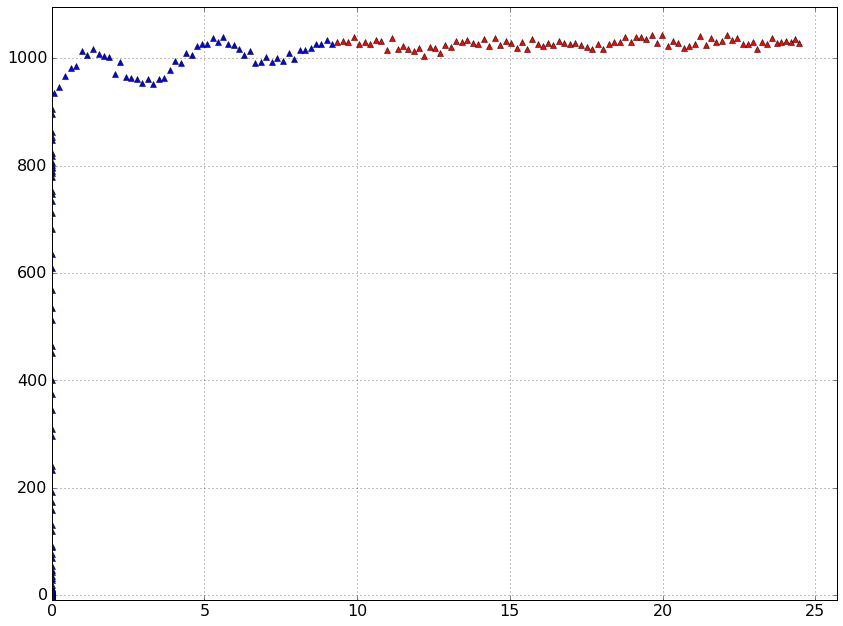

In [362]:
import test_suite
reload(test_suite)
predictions = test_suite.kcluster(data,numclusters=2).predict(data[:,0].reshape(-1,1))

initgroup = predictions[0]
splitgroup = 0

for index, val in enumerate(predictions):
    
    # as soon as we reach the new group, we have found our dividing point
    if val != initgroup:
        splitgroup = index
        break
        
"""Instead of creating tuples, we create lists"""
elastic = test_suite.combine_data(data[:splitgroup,0],data[:splitgroup,1]) 
plastic = test_suite.combine_data(data[splitgroup:,0],data[splitgroup:,1])

# -- not just splitting data evenly
print len(elastic), len(plastic)
graph_suite.plotmult2D(elastic,plastic)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 483.9074613791127, 55.042999302308317, 110.73772337860352, 81.55821186119735, 16.321886545443512, 155.26524796997816, -34.657395546455959, 52.377466712944305, -44.314592017158112, -25.304979173358394, -6.2223312337158383, -178.68391220094077, 122.66424938744959, -158.80885593350402, -5.8718500295551532, -13.368714319813277, -41.338583388880323, 46.377603721288978, -54.142953738878489, 53.384630071925812, 7.0662652222065674, 85.18925403548667, 96.432471525171891, -21.118424192751849, 102.28778900790611, -17.657800825343923, 88.873904977480336, 26.057424865319291, 3.1942738634831604, 62.59847877406331, -42.865208995862268, 50.7496524300

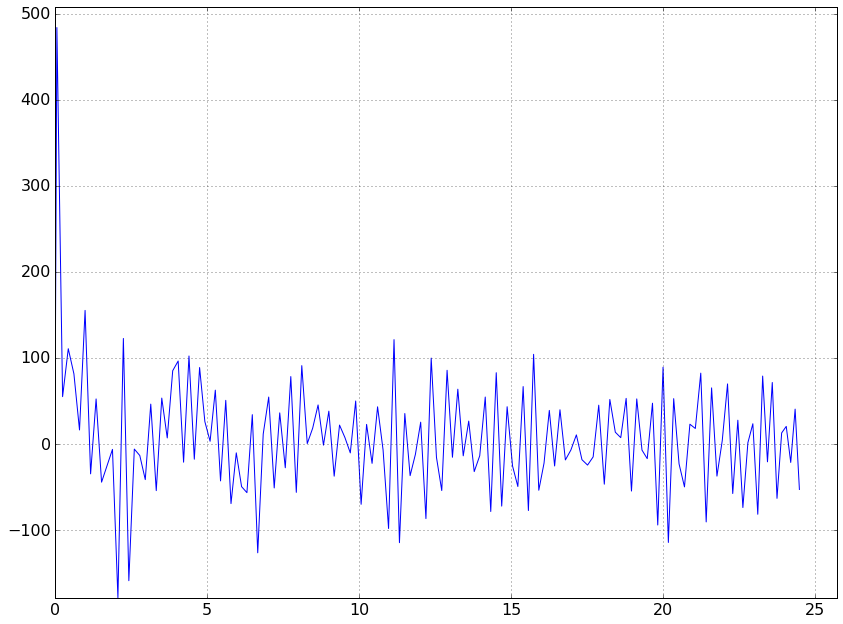

In [7]:
import math

for index, slope in enumerate(slopes):
    if math.isinf(slope) or math.isnan(slope):
        slopes[index]=0
print slopes
graph_suite.plot2D(test_suite.combine_data(data[:,0],slopes))

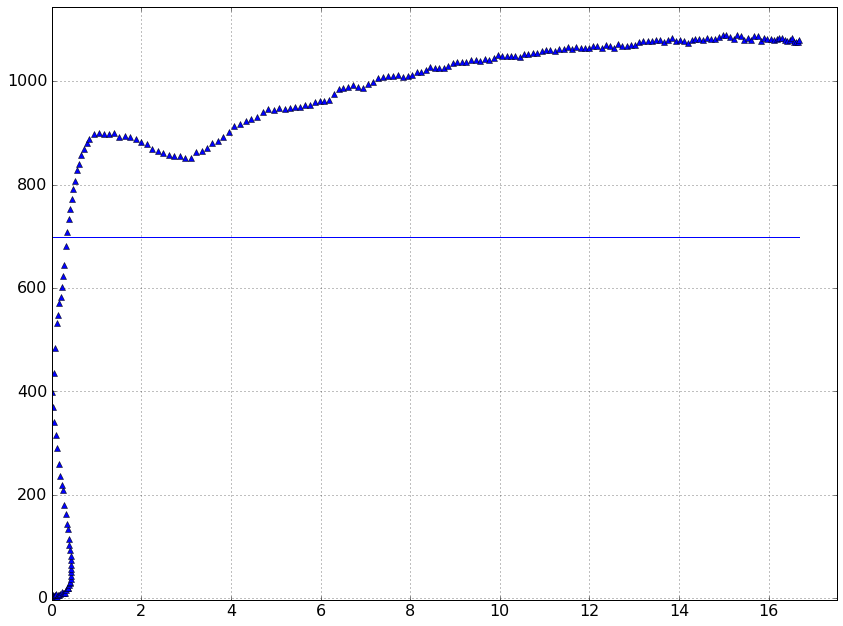

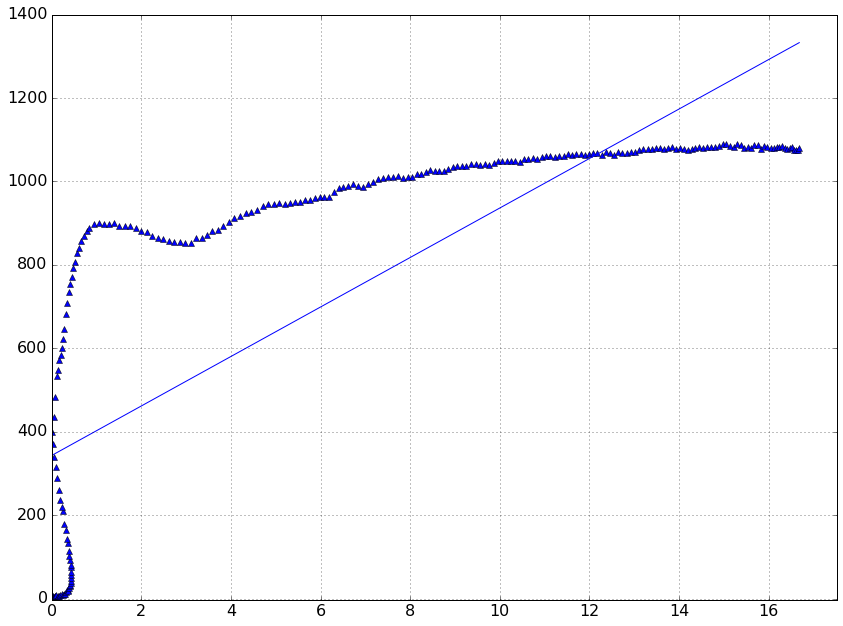

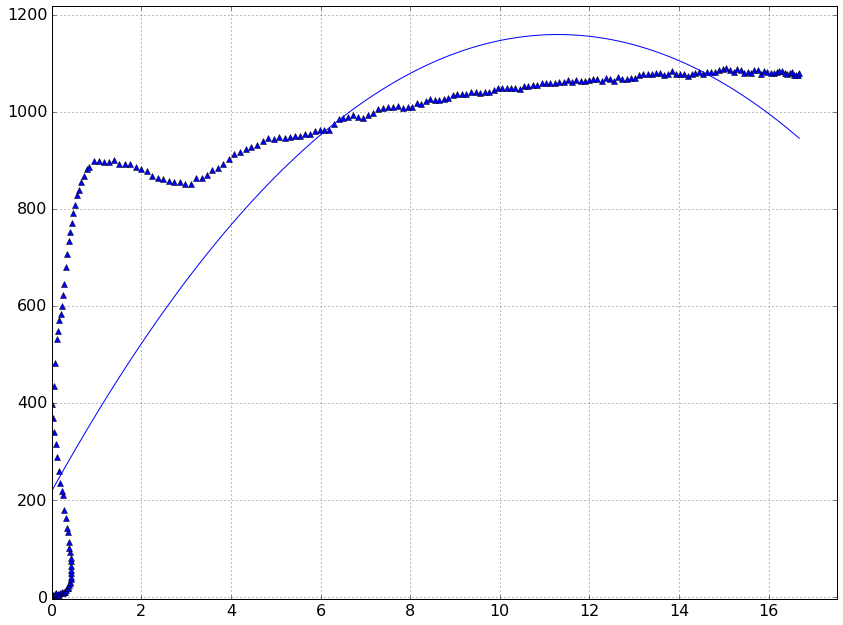

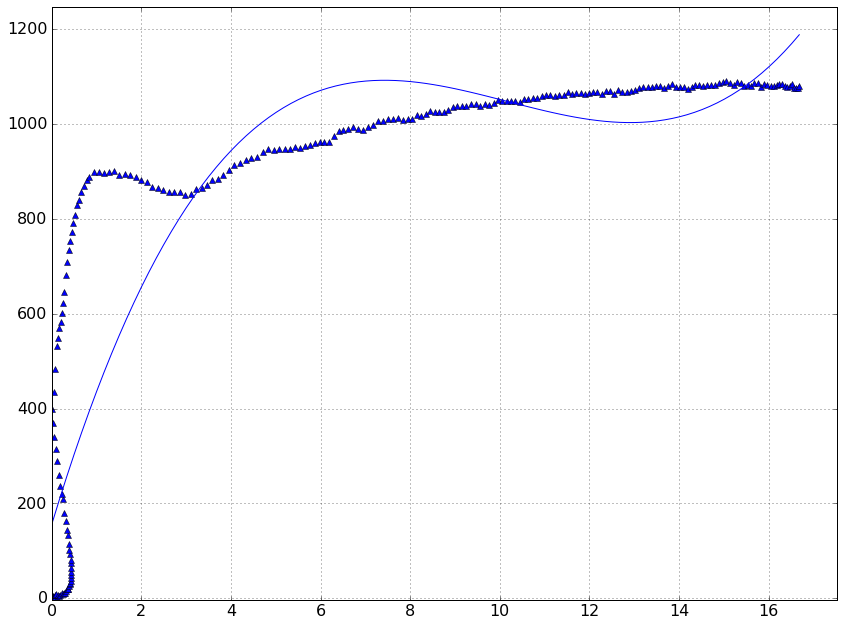

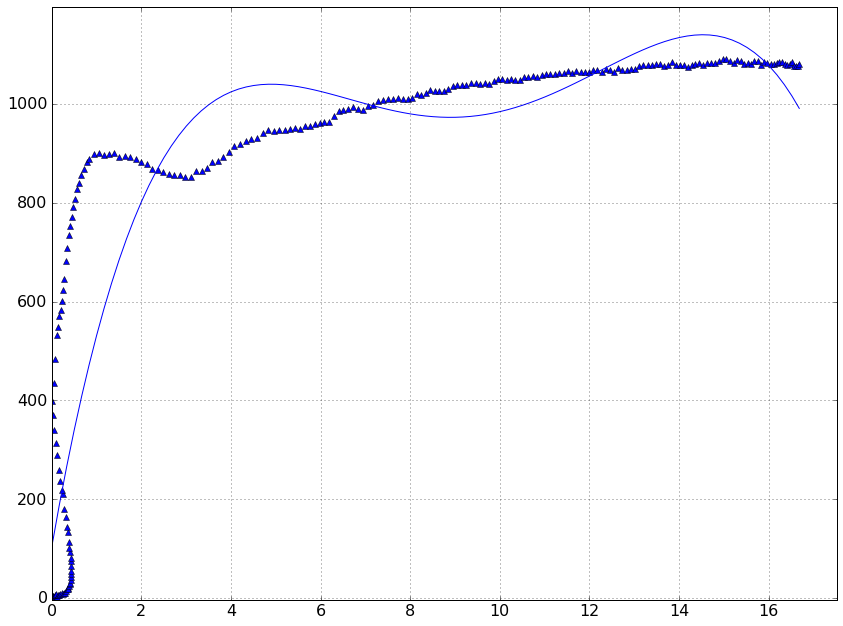

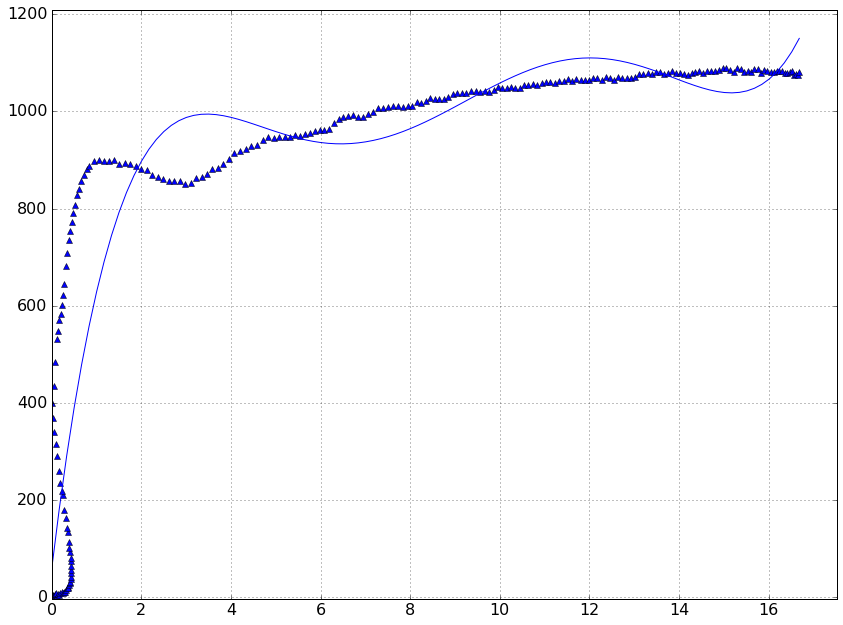

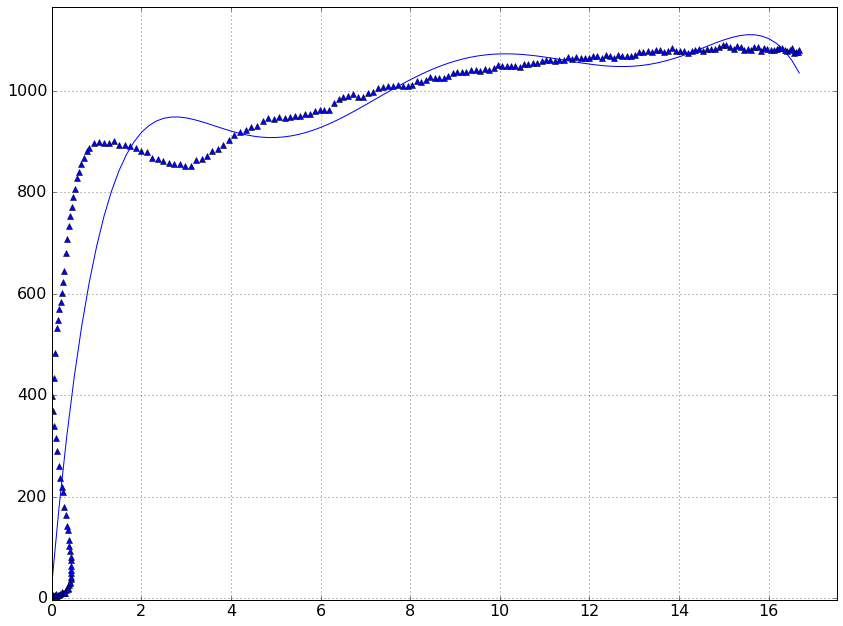

In [98]:
from numpy import polyfit
import numpy as np
from irreversible_stressstrain import StressStrain
import graph_suite
data = StressStrain('ref/HSRS/22').get_experimental_data()

for degree in xrange(7):
    func = np.poly1d(polyfit(data[:,0],data[:,1],degree))

    guess_domain = np.linspace(0,max(data[:,0]),101.)
    guess_vals = func(guess_domain)

    graph_suite.plotmult2D(data,test_suite.combine_data(guess_domain,guess_vals), marker2 = 'b-')

## When starting each off looking at all the points up to the last 100, the slopes provide a better estimation of yield stress

There were 152 elastic points and 110 plastic points.


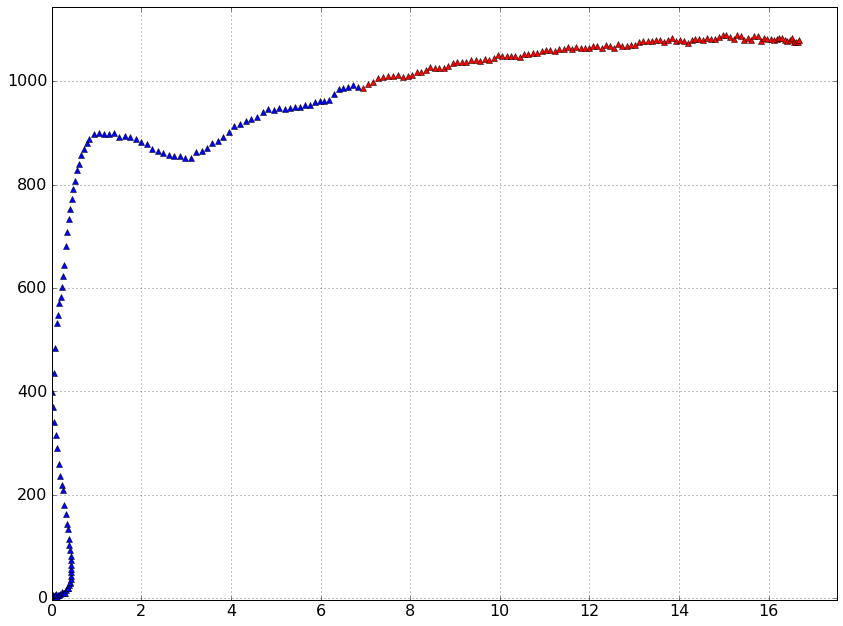

In [44]:
start = -100

guess_domain = np.linspace(0,max(data[:start,0]),101.)
#predictions = test_suite.kcluster(test_suite.combine_data(data[:start,0],slopes),numclusters=2).predict(data[:start,0].reshape(-1,1))
predictions = test_suite.kcluster(data,numclusters=2).predict(data[:start,0].reshape(-1,1))
initgroup = predictions[0]
splitgroup = 0

for index, val in enumerate(predictions):
    
    # as soon as we reach the new group, we have found our dividing point
    if val != initgroup:
        splitgroup = index
        break
        
"""Instead of creating tuples, we create lists"""
elastic = test_suite.combine_data(data[:splitgroup,0],data[:splitgroup,1]) 
plastic = test_suite.combine_data(data[splitgroup:,0],data[splitgroup:,1])

# -- not just splitting data evenly
print "There were", len(elastic), "elastic points and", len(plastic), "plastic points."
graph_suite.plotmult2D(elastic,plastic)

There were 115 elastic points and 147 plastic points.


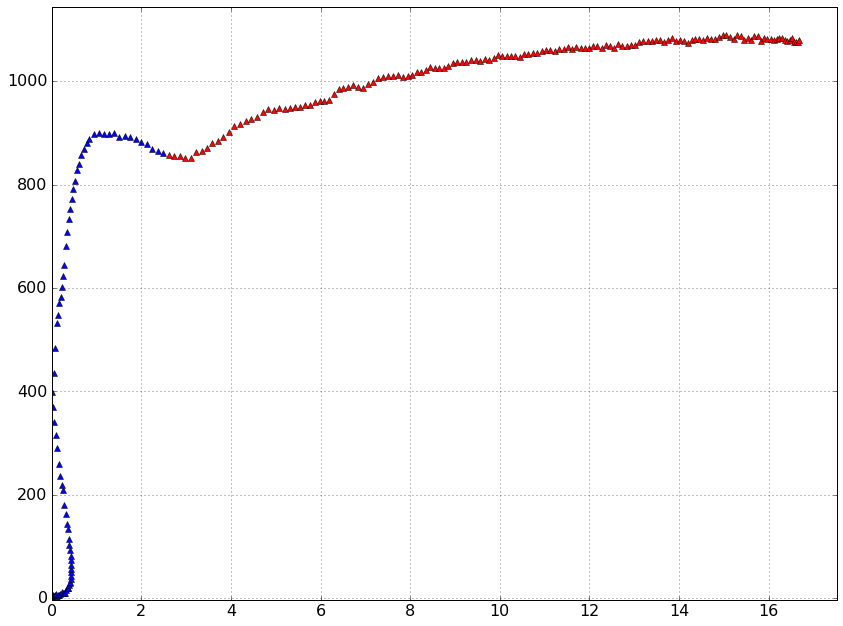

In [55]:
start = -110

guess_domain = np.linspace(0,max(data[:start,0]),101.)
predictions = test_suite.kcluster(test_suite.combine_data(data[:start,0],slopes),numclusters=2).predict(data[:start,0].reshape(-1,1))
#predictions = test_suite.kcluster(data,numclusters=2).predict(data[:start,0].reshape(-1,1))
initgroup = predictions[0]
splitgroup = 0

for index, val in enumerate(predictions):
    
    # as soon as we reach the new group, we have found our dividing point
    if val != initgroup:
        splitgroup = index
        break
        
"""Instead of creating tuples, we create lists"""
elastic = test_suite.combine_data(data[:splitgroup,0],data[:splitgroup,1]) 
plastic = test_suite.combine_data(data[splitgroup:,0],data[splitgroup:,1])

# -- not just splitting data evenly
print "There were", len(elastic), "elastic points and", len(plastic), "plastic points."
graph_suite.plotmult2D(elastic,plastic)

In [58]:
print slopes[119] # here it is clearly around zero slope

2.59000333471


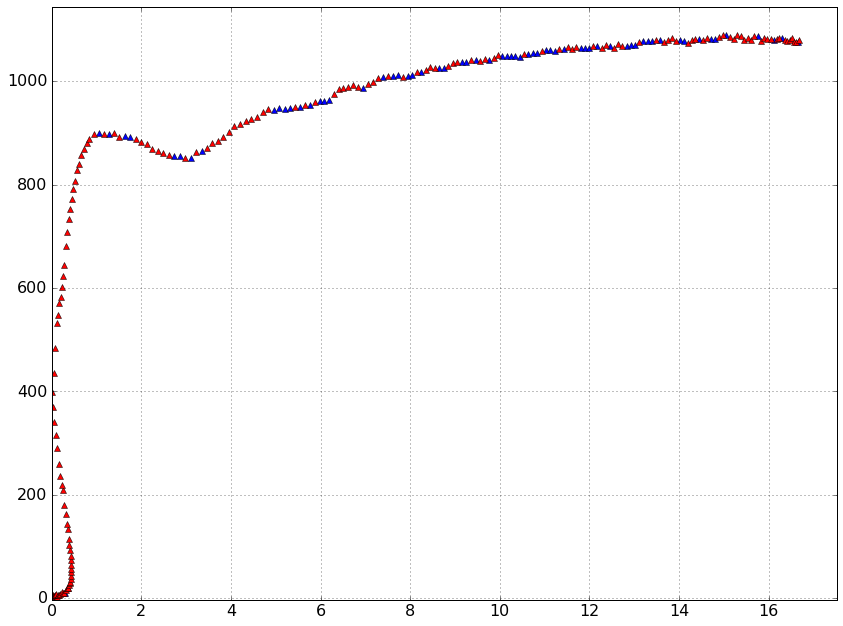

In [89]:
"""Separates points into two groups"""
goodindices = [slopes.index(slope) for slope in slopes if abs(slope)<20]
badindices = [slopes.index(slope) for slope in slopes if abs(slope)>=20]

x_vals1 = []
y_vals1 = []

x_vals2 = []
y_vals2 = []

for index in goodindices:
    x_vals1.append(data[index,0])
    y_vals1.append(data[index,1])
    
for index in badindices:
    x_vals2.append(data[index,0])
    y_vals2.append(data[index,1])
    
flat_points = test_suite.combine_data(x_vals1,y_vals1)    
steep_points = test_suite.combine_data(x_vals2,y_vals2)

graph_suite.plotmult2D(flat_points,steep_points)

## See if we can cluster based on the function values of 1 for steep, 0 for shallow

In [93]:
print slopes
        

[0, 555.50353242616472, -1052.6026184028797, -2297.3848942825398, 4691.5387672458819, -3401.9768639915055, 4977.2452344043177, -506.37934248574243, -526.5482410566417, 151.27434089289167, 0.042987490128562886, -7876.1458615485762, 5740.9851212577869, -10683.964792260265, 16239.143081132101, 2225.335752947286, 3797.0397615604656, -384.13788967865077, -1039.9036107769214, -2419.868132251007, 939.97549181577313, -2012.9378702992724, 2525.3515925629658, -536.59213189056868, -624.99730468081634, 262.79827821435168, 579.82460600633488, 970.73894920172552, -101.64804588287438, 48.433579792949487, 429.86489881516724, -1479.0671376894788, 765.93941818323003, -40.285076702862881, -378.59233258598562, 697.46614470709358, -480.68361339745047, 645.1063767490474, -135.52393607530644, 309.73531177091991, 203.46506839484192, -200.62619401120457, 216.41804006909018, -39.710304437378866, 99.47690269798872, 153.99717241031917, -95.871659511364413, 58.063287988629995, -19.754100600340834, 240.295574934011

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
